# Power to the PEOPLE
## is it time for Universal Basic Income?

## The obejective of this workbook is to analyse the data from the 2016 Dalia Research survey on Europeans and their preception of Universal Basic Income (UBI).

## The following questions will be investigated:
### - What is the distribution of awareness of UBI across the participants of the survey?
### - What are the participant's arguments against UBI?
### - What are the participant's arguments for UBI?
### - What are the participants expected personal effects of UBI?

## Arguments analysis:
### Due to the structure of how the survey was answered, a participant could answer some questions with multiple responses. So these questions had to be checked to see if each of the variant responses were present.

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
# Extract the csv into DataFrame
df = pd.read_csv(r'basic_income_dataset_dalia.csv')
df

,country_code,uuid,age,gender,rural,dem_education_level,dem_full_time_job,dem_has_children,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39,0.977591916
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65,58.731.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,SK,7d1ac020-dcb4-0133-817a-0a81e8b09a82,37,female,urban,high,yes,no,I understand it fully,I would probably vote for it,‰Û_ spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance,26_39,0.453410894
9645,SK,39f989f0-db52-0133-8482-0a81e8b09a82,53,male,urban,high,yes,yes,I have never heard of it,I would probably vote against it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,40_65,0.426123797
9646,SK,70ce4a90-d965-0133-f5e4-0a81e8b09a82,24,male,urban,low,no,no,I have heard just a little about it,I would not vote,‰Û_ spend more time with my family,It reduces anxiety about financing basic needs,None of the above,14_25,0.60768811
9647,SK,2896e440-db3c-0133-5b67-0a81e8b09a82,47,male,urban,low,yes,yes,I understand it fully,I would vote for it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,40_65,0.80894412


# Cleaning Data Set

In [226]:
# Get list of columns headers
list(df.columns)

['country_code',
 'uuid',
 'age',
 'gender',
 'rural',
 'dem_education_level',
 'dem_full_time_job',
 'dem_has_children',
 'question_bbi_2016wave4_basicincome_awareness',
 'question_bbi_2016wave4_basicincome_vote',
 'question_bbi_2016wave4_basicincome_effect',
 'question_bbi_2016wave4_basicincome_argumentsfor',
 'question_bbi_2016wave4_basicincome_argumentsagainst',
 'age_group',
 'weight']

In [227]:
# Sanitise column names
renamed_col = df.rename(columns={'country_code': "CountryCode",
                                 'uuid': "ID",
                                 'age': "Age",
                                 'gender': "Gender",
                                 'rural': "Rural",
                                 'dem_education_level': "EducationLevel",
                                 'dem_full_time_job': "FullTimeJob",
                                 'dem_has_children': "HasChildren",
                                 'question_bbi_2016wave4_basicincome_awareness': "BasicIncomeAwareness",
                                 'question_bbi_2016wave4_basicincome_vote': "BasicIncomeVote",
                                 'question_bbi_2016wave4_basicincome_effect': "BasicIncomeEffect",
                                 'question_bbi_2016wave4_basicincome_argumentsfor': "BasicIncomeArgumentFor",
                                 'question_bbi_2016wave4_basicincome_argumentsagainst': "BasicIncomeArgumentAgainst",
                                 'age_group': "AgeGroup",
                                 'weight': "Weight"})
print(renamed_col)

     CountryCode                                    ID  Age  Gender  Rural  \
0             AT  f6e7ee00-deac-0133-4de8-0a81e8b09a82   61    male  rural   
1             AT  54f0f1c0-dda1-0133-a559-0a81e8b09a82   57    male  urban   
2             AT  83127080-da3d-0133-c74f-0a81e8b09a82   32    male  urban   
3             AT  15626d40-db13-0133-ea5c-0a81e8b09a82   45    male  rural   
4             AT  24954a70-db98-0133-4a64-0a81e8b09a82   41  female  urban   
...          ...                                   ...  ...     ...    ...   
9644          SK  7d1ac020-dcb4-0133-817a-0a81e8b09a82   37  female  urban   
9645          SK  39f989f0-db52-0133-8482-0a81e8b09a82   53    male  urban   
9646          SK  70ce4a90-d965-0133-f5e4-0a81e8b09a82   24    male  urban   
9647          SK  2896e440-db3c-0133-5b67-0a81e8b09a82   47    male  urban   
9648          SK  06217ba0-dd56-0133-edda-0a81e8b09a82   51  female  urban   

     EducationLevel FullTimeJob HasChildren  \
0               

In [228]:
# Replaced miscellaneous characters
renamed_col["AgeGroup"] = renamed_col["AgeGroup"].apply(lambda x: x.replace("_", "-"))
renamed_col["BasicIncomeEffect"] = renamed_col["BasicIncomeEffect"].apply(lambda x: x.replace("‰Û_ ", ""))

In [229]:
# Country Code values

Country= {"AL": "Albania",
        "AD": "Andorra",
        "AM": "Armenia",
        "AT": "Austria",
        "BY": "Belarus",
        "BE": "Belgium",
        "BA": "Bosnia",
        "BG": "Bulgaria",
        "CH": "Switzerland",
        "CY": "Cyprus",
        "CZ": "Czech Republic",
        "DE": "Germany",
        "DK": "Denmark",
        "EE": "Estonia",
        "ES": "Spain",
        "FO": "Faeroe Islands",
        "FI": "Finland",
        "FR": "France",
        "GB": "United Kingdom",
        "GE": "Georgia",
        "GI": "Gibraltar",
        "GR": "Greece",
        "HU": "Hungary",
        "HR": "Croatia",
        "IE": "Ireland",
        "IS": "Iceland",
        "IT": "Italy",
        "LI": "Liechtenstein",
        "LT": "Lithuania",
        "LU": "Luxembourg",
        "LV": "Latvia",
        "MC": "Monaco",
        "MK": "Macedonia",
        "MT": "Malta",
        "NO": "Norway",
        "NL": "Netherlands",
        "PL": "Poland",
        "PT": "Portugal",
        "RO": "Romania",
        "RU": "Russian Federation",
        "SE": "Sweden",
        "SI": "Slovenia",
        "SK": "Slovakia",
        "SM": "San Marino",
        "TR": "Turkey",
        "UA": "Ukraine",
        "VA": "Vatican City State"}

def get_country(countrycode):
    """
    Function to identify the Country with a given CountryCode
    """
    for key, value in Country.items():
        if key in countrycode:
            return (value)

def vote_check(vote):
    """
    Function to categorise the Voting intention
    """
    if "for" in vote:
        return 1
    elif "against" in vote:
        return -1
    else:
        return 0
    
# Cleaned Dataframe
cleaned_df = renamed_col
cleaned_df["Country"] = cleaned_df["CountryCode"].apply(lambda x: get_country(x))
cleaned_df["Vote"] = cleaned_df["BasicIncomeVote"].apply(lambda x: vote_check(x))
cleaned_df

,CountryCode,ID,Age,Gender,Rural,EducationLevel,FullTimeJob,HasChildren,BasicIncomeAwareness,BasicIncomeVote,BasicIncomeEffect,BasicIncomeArgumentFor,BasicIncomeArgumentAgainst,AgeGroup,Weight,Country,Vote
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40-65,1.105.534.474,Austria,0
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40-65,1.533.248.826,Austria,1
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26-39,0.977591916,Austria,0
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,work less,It reduces anxiety about financing basic needs,None of the above,40-65,1.105.534.474,Austria,1
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40-65,58.731.136,Austria,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,SK,7d1ac020-dcb4-0133-817a-0a81e8b09a82,37,female,urban,high,yes,no,I understand it fully,I would probably vote for it,spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance,26-39,0.453410894,Slovakia,1
9645,SK,39f989f0-db52-0133-8482-0a81e8b09a82,53,male,urban,high,yes,yes,I have never heard of it,I would probably vote against it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,40-65,0.426123797,Slovakia,-1
9646,SK,70ce4a90-d965-0133-f5e4-0a81e8b09a82,24,male,urban,low,no,no,I have heard just a little about it,I would not vote,spend more time with my family,It reduces anxiety about financing basic needs,None of the above,14-25,0.60768811,Slovakia,0
9647,SK,2896e440-db3c-0133-5b67-0a81e8b09a82,47,male,urban,low,yes,yes,I understand it fully,I would vote for it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,40-65,0.80894412,Slovakia,1


# Analysing data

In [230]:
# Calculating counts of all the variant options
count_for = cleaned_df.BasicIncomeArgumentFor.value_counts().to_frame()
count_against = cleaned_df.BasicIncomeArgumentAgainst.value_counts().to_frame()
count_effect = cleaned_df.BasicIncomeEffect.value_counts().to_frame()
count_vote = cleaned_df.BasicIncomeVote.value_counts().to_frame()
count_awareness = cleaned_df.BasicIncomeAwareness.value_counts().to_frame()

In [231]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(count_effect)
    print(count_for)
    print(count_against)
    print(count_vote)
    print(count_awareness)

                                                 BasicIncomeEffect
A basic income would not affect my work choices               3349
spend more time with my family                                1387
None of the above                                             1227
gain additional skills                                         970
look for a different job                                       640
work less                                                      629
do more volunteering work                                      615
work as a freelancer                                           465
stop working                                                   367
                                                    BasicIncomeArgumentFor
None of the above                                                     2163
It reduces anxiety about financing basic needs                        1273
It creates more equality of opportunity                                848
It encourages financial indepe

In [232]:
# Converting each Arugement into a True/False column For UBI
print(count_for.index.tolist()[:7])
print(count_against.index.tolist()[:7])
print(count_effect.index.tolist())
print(count_vote.index.tolist())
print(count_awareness.index.tolist())

['None of the above', 'It reduces anxiety about financing basic needs', 'It creates more equality of opportunity', 'It encourages financial independence and self-responsibility', 'It increases solidarity, because it is funded by everyone', 'It increases appreciation for household work and volunteering', 'It reduces bureaucracy and administrative expenses']
['None of the above', 'Only the people who need it most should get something from the state', 'It might encourage people to stop working', 'It is impossible to finance', 'Foreigners might come to my country and take advantage of the benefit', 'It increases dependence on the state', 'It is against the principle of linking merit and reward']
['A basic income would not affect my work choices', 'spend more time with my family', 'None of the above', 'gain additional skills', 'look for a different job', 'work less', 'do more volunteering work', 'work as a freelancer', 'stop working']
['I would probably vote for it', 'I would vote for it', 

In [233]:
# Temporary dictionary to count all the variant options

basic_income_vote = {'I would probably vote for it': 0,
                     'I would vote for it': 0,
                     'I would probably vote against it': 0,
                     'I would not vote': 0,
                     'I would vote against it': 0}

basic_income_vote_simple = {"For": 0,
                           "Against": 0,
                           "No Vote": 0}

basic_income_effect = {'A basic income would not affect my work choices': 0,
                       'spend more time with my family': 0,
                       'None of the above': 0,
                       'gain additional skills': 0,
                       'look for a different job': 0,
                       'work less': 0,
                       'do more volunteering work': 0,
                       'work as a freelancer': 0,
                       'stop working': 0}

arguments_for = {'None of the above': 0,
                 'It reduces anxiety about financing basic needs': 0,
                 'It creates more equality of opportunity': 0,
                 'It encourages financial independence and self-responsibility': 0,
                 'It increases solidarity, because it is funded by everyone': 0,
                 'It increases appreciation for household work and volunteering': 0,
                 'It reduces bureaucracy and administrative expenses': 0}

arguments_against = {'None of the above': 0,
                     'Only the people who need it most should get something from the state': 0,
                     'It might encourage people to stop working': 0,
                     'It is impossible to finance': 0,
                     'Foreigners might come to my country and take advantage of the benefit': 0,
                     'It increases dependence on the state': 0,
                     'It is against the principle of linking merit and reward': 0}

awareness = {'I know something about it': 0,
             'I understand it fully': 0,
             'I have heard just a little about it': 0,
             'I have never heard of it': 0}

# Finding how many times each argument is mentioned

for index, row in count_vote.iterrows():
    for value in basic_income_vote:
        if value in index:
            basic_income_vote[value] += int(row["BasicIncomeVote"])

for index, row in count_vote.iterrows():
    for value in basic_income_vote_simple:
        if "for" in index:
            basic_income_vote_simple["For"] += int(row["BasicIncomeVote"])
        if "against" in index:
            basic_income_vote_simple["Against"] += int(row["BasicIncomeVote"])
        if "not vote" in index:
            basic_income_vote_simple["No Vote"] += int(row["BasicIncomeVote"])

for index, row in count_effect.iterrows():
    for value in basic_income_effect:
        if value in index:
            basic_income_effect[value] += int(row["BasicIncomeEffect"])  
            
for index, row in count_for.iterrows():
    for value in arguments_for:
        if value in index:
            arguments_for[value] += int(row["BasicIncomeArgumentFor"])

for index, row in count_against.iterrows():
    for value in arguments_against:
        if value in index:
            arguments_against[value] += int(row["BasicIncomeArgumentAgainst"])
             
for index, row in count_awareness.iterrows():
    for value in awareness:
        if value in index:
            awareness[value] += int(row["BasicIncomeAwareness"])

In [234]:
# Reorder by highest counts
arguments_for = dict(sorted(arguments_for.items(), key=lambda item: item[1]))
arguments_against = dict(sorted(arguments_against.items(), key=lambda item: item[1]))
basic_income_effect = dict(sorted(basic_income_effect.items(), key=lambda item: item[1]))
basic_income_vote = dict(sorted(basic_income_vote.items(), key=lambda item: item[1]))
basic_income_vote_simple = dict(sorted(basic_income_vote_simple.items(), key=lambda item: item[1]))
awareness = dict(sorted(awareness.items(), key=lambda item: item[1]))

print(arguments_for)
print(arguments_against)
print(basic_income_effect)
print(basic_income_vote)
print(basic_income_vote_simple)
print(awareness)

{'It reduces bureaucracy and administrative expenses': 1510, 'It increases appreciation for household work and volunteering': 2013, 'It increases solidarity, because it is funded by everyone': 2052, 'It encourages financial independence and self-responsibility': 2148, 'None of the above': 2163, 'It creates more equality of opportunity': 2955, 'It reduces anxiety about financing basic needs': 3893}
{'None of the above': 1381, 'It is against the principle of linking merit and reward': 2082, 'It increases dependence on the state': 2394, 'Only the people who need it most should get something from the state': 3107, 'It is impossible to finance': 3218, 'Foreigners might come to my country and take advantage of the benefit': 3341, 'It might encourage people to stop working': 4232}
{'stop working': 367, 'work as a freelancer': 465, 'do more volunteering work': 615, 'work less': 629, 'look for a different job': 640, 'gain additional skills': 970, 'None of the above': 1227, 'spend more time with

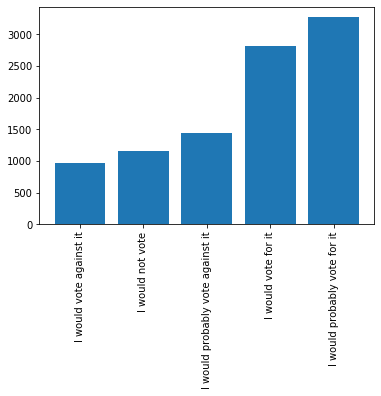

In [235]:
# Plot distribution of Basic Income Vote
plt.bar(range(len(basic_income_vote)), list(basic_income_vote.values()), align='center')
plt.xticks(range(len(basic_income_vote)), list(basic_income_vote.keys()), rotation='vertical')
plt.show()

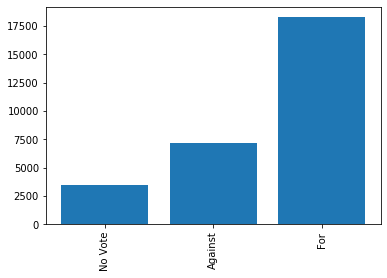

In [236]:
# Plot distribution of Basic Income Vote
plt.bar(range(len(basic_income_vote_simple)), list(basic_income_vote_simple.values()), align='center')
plt.xticks(range(len(basic_income_vote_simple)), list(basic_income_vote_simple.keys()), rotation='vertical')
plt.show()

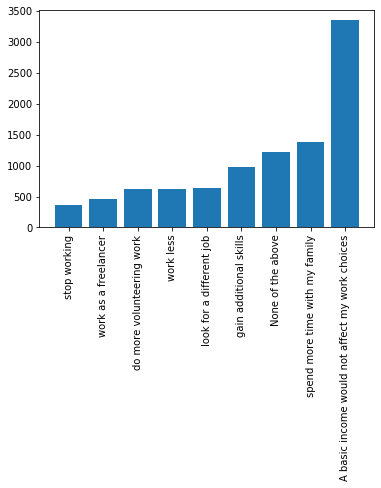

In [237]:
# Plot distribution of Basic Income Effect
plt.bar(range(len(basic_income_effect)), list(basic_income_effect.values()), align='center')
plt.xticks(range(len(basic_income_effect)), list(basic_income_effect.keys()), rotation='vertical')
plt.show()

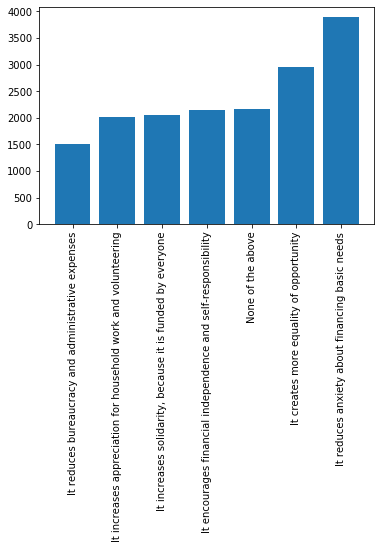

In [238]:
# Plot distribution of Arguments For
plt.bar(range(len(arguments_for)), list(arguments_for.values()), align='center')
plt.xticks(range(len(arguments_for)), list(arguments_for.keys()), rotation='vertical')
plt.show()

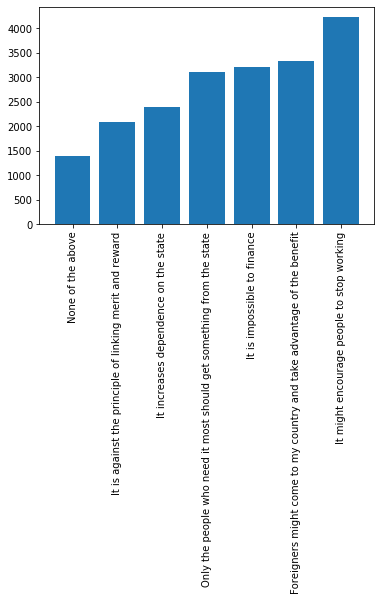

In [239]:
# Plot distribution of Arguments Against
plt.bar(range(len(arguments_against)), list(arguments_against.values()), align='center')
plt.xticks(range(len(arguments_against)), list(arguments_against.keys()), rotation='vertical')
plt.show()

In [240]:
cleaned_df

,CountryCode,ID,Age,Gender,Rural,EducationLevel,FullTimeJob,HasChildren,BasicIncomeAwareness,BasicIncomeVote,BasicIncomeEffect,BasicIncomeArgumentFor,BasicIncomeArgumentAgainst,AgeGroup,Weight,Country,Vote
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40-65,1.105.534.474,Austria,0
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40-65,1.533.248.826,Austria,1
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26-39,0.977591916,Austria,0
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,work less,It reduces anxiety about financing basic needs,None of the above,40-65,1.105.534.474,Austria,1
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40-65,58.731.136,Austria,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,SK,7d1ac020-dcb4-0133-817a-0a81e8b09a82,37,female,urban,high,yes,no,I understand it fully,I would probably vote for it,spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance,26-39,0.453410894,Slovakia,1
9645,SK,39f989f0-db52-0133-8482-0a81e8b09a82,53,male,urban,high,yes,yes,I have never heard of it,I would probably vote against it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,40-65,0.426123797,Slovakia,-1
9646,SK,70ce4a90-d965-0133-f5e4-0a81e8b09a82,24,male,urban,low,no,no,I have heard just a little about it,I would not vote,spend more time with my family,It reduces anxiety about financing basic needs,None of the above,14-25,0.60768811,Slovakia,0
9647,SK,2896e440-db3c-0133-5b67-0a81e8b09a82,47,male,urban,low,yes,yes,I understand it fully,I would vote for it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,40-65,0.80894412,Slovakia,1
